In [1]:
!curl -O https://lazyprogrammer.me/course_files/airline_passengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  2036  100  2036    0     0    752      0  0:00:02  0:00:02 --:--:--   752
100  2036  100  2036    0     0    751      0  0:00:02  0:00:02 --:--:--   751


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


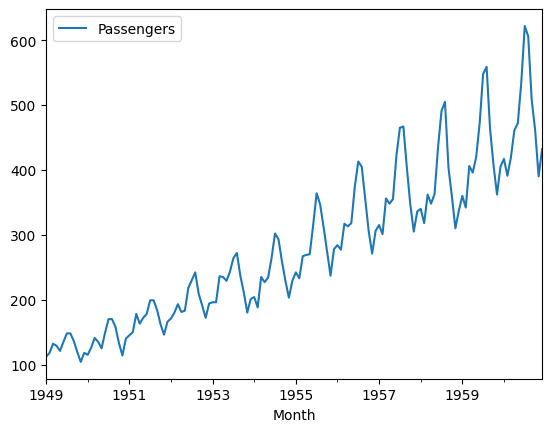

In [13]:
df.plot();

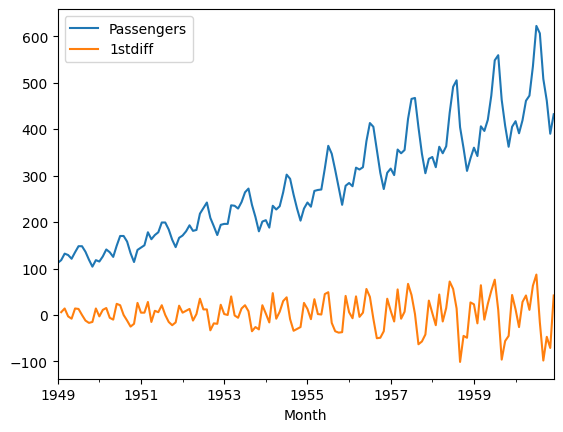

In [14]:
df['1stdiff'] = df['Passengers'].diff()
df.plot();

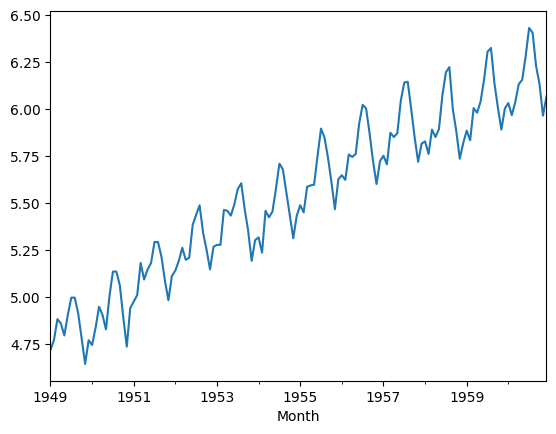

In [15]:
# Compute log of data
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot();

In [27]:
from statsmodels.tsa.arima.model import ARIMA
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [28]:
# First set p=1, d=0, q=0
arima = ARIMA(train['Passengers'], order=(1, 0, 0))
arima_result = arima.fit()

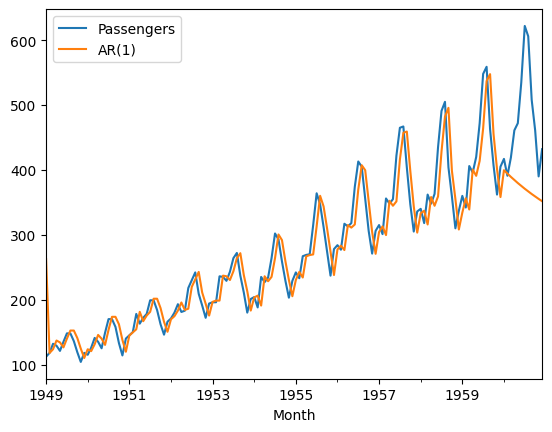

In [35]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1]
)

forecast_results = arima_result.get_forecast(Ntest)
df.loc[test_idx, 'AR(1)'] = forecast_results.predicted_mean
df[['Passengers', 'AR(1)']].plot();

In [38]:
# Get the confidence interval for prediction
print(type(forecast_results))
forecast_results.conf_int()

<class 'statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper'>


,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [33]:
def plot_fit_and_forecast(result):
    _, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['Passengers'], label='data')

    # plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
                    lower, upper, \
                    color='red', alpha=0.3)
    ax.legend()

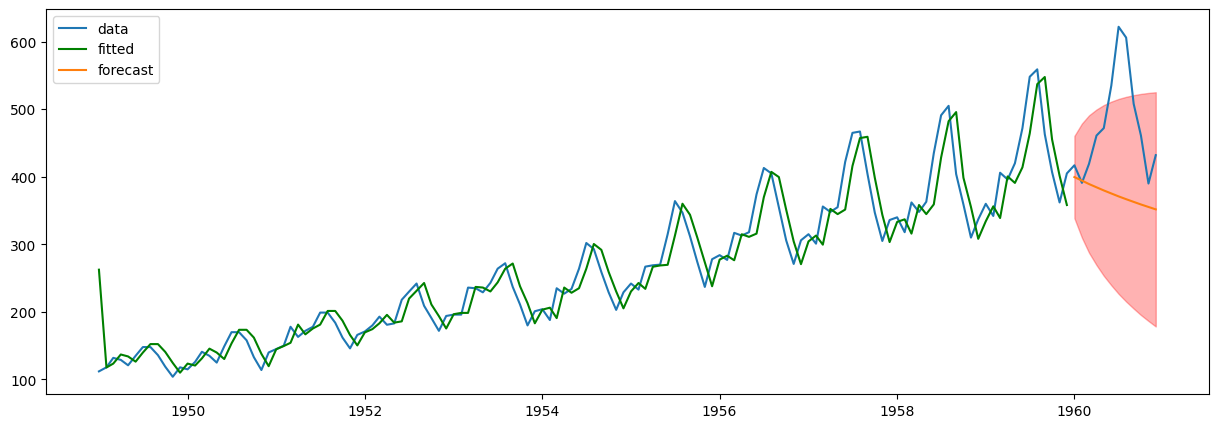

In [34]:
plot_fit_and_forecast(arima_result)

c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


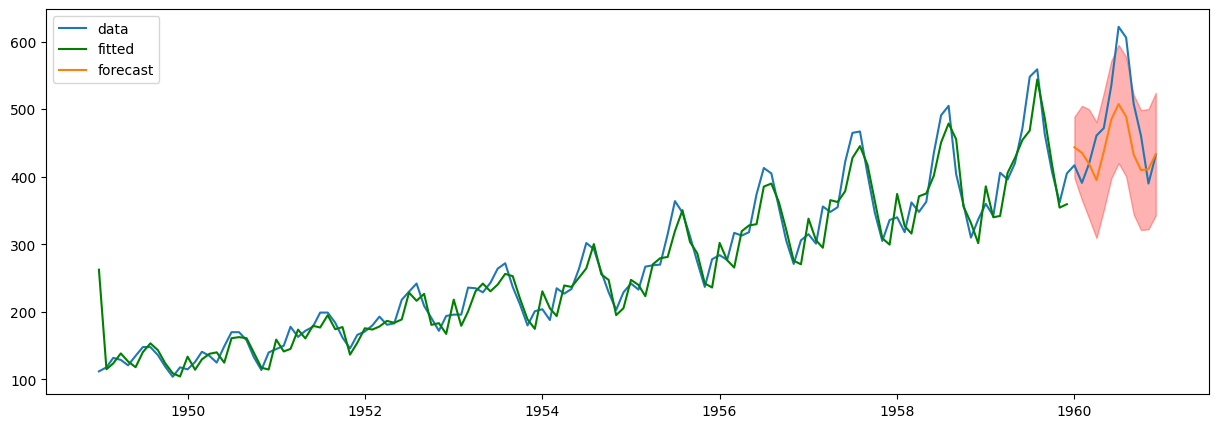

In [39]:
# Set to be ARIMA(10, 0, 0)
arima = ARIMA(train['Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


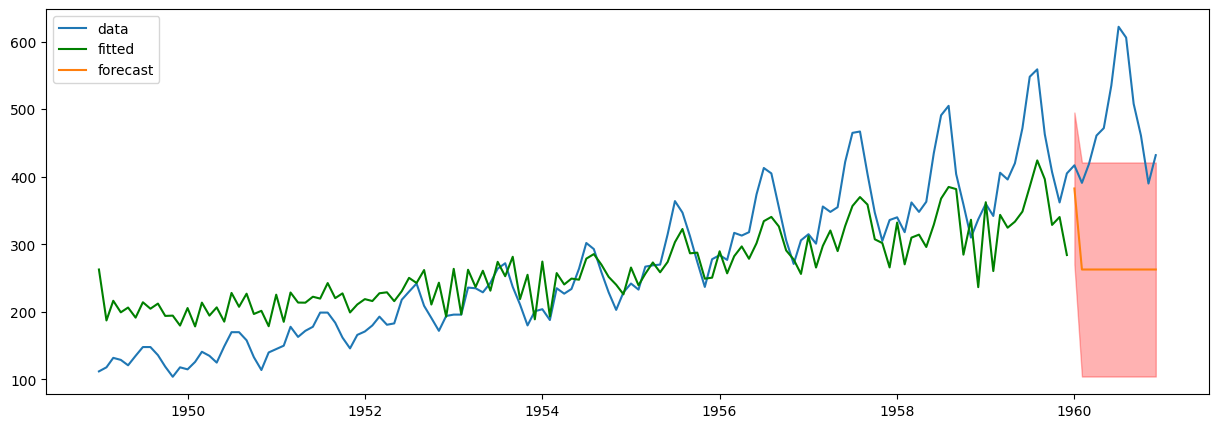

In [40]:
# Set to be ARIMA(0, 0, 1)
arima = ARIMA(train['Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

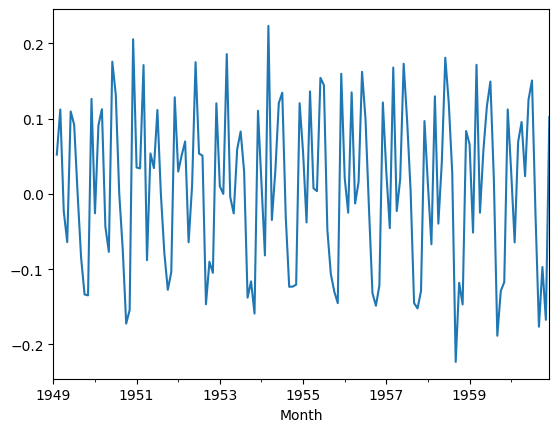

In [42]:
# Now use log difference
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot();

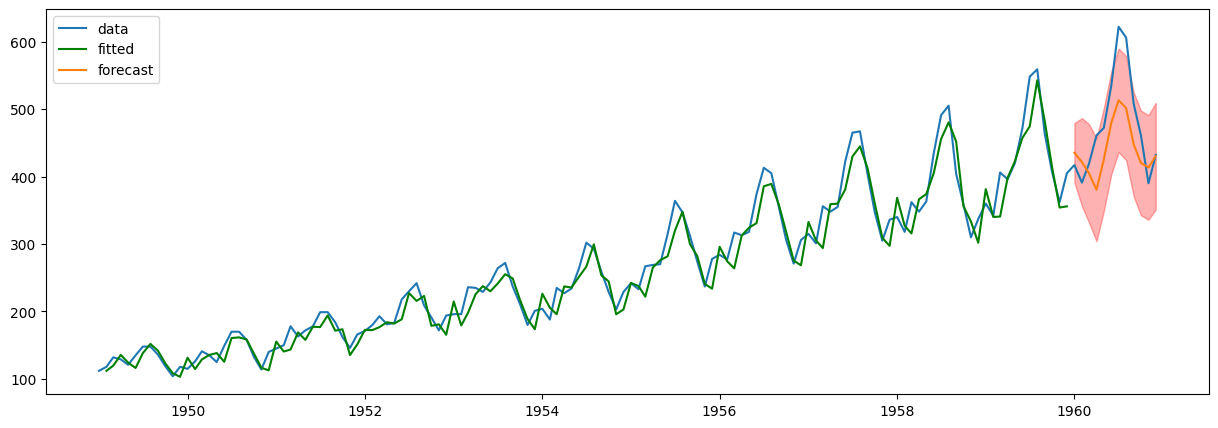

In [43]:
# fit ARIMA model
arima = ARIMA(train['Passengers'], order=(8, 1, 1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
  _, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

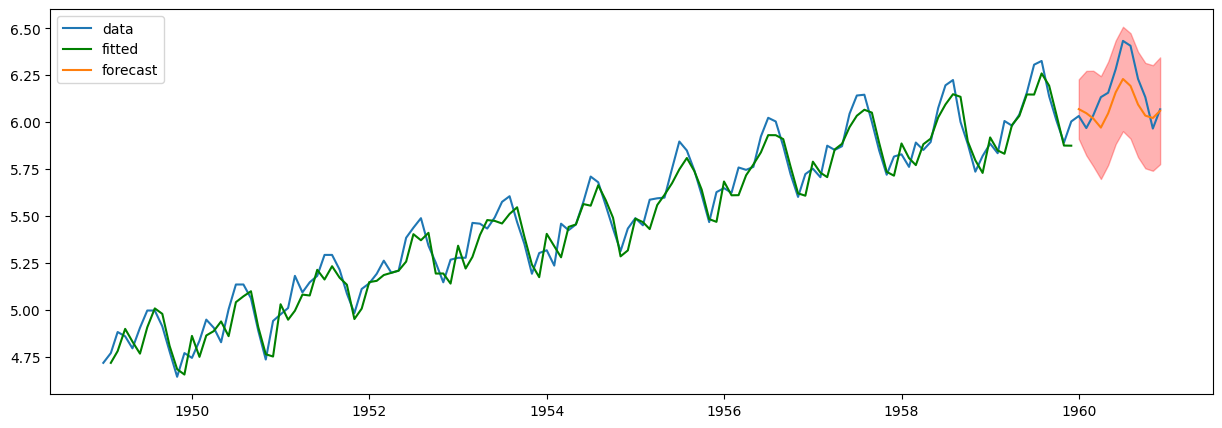

In [44]:
# Fit with log of passengers
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


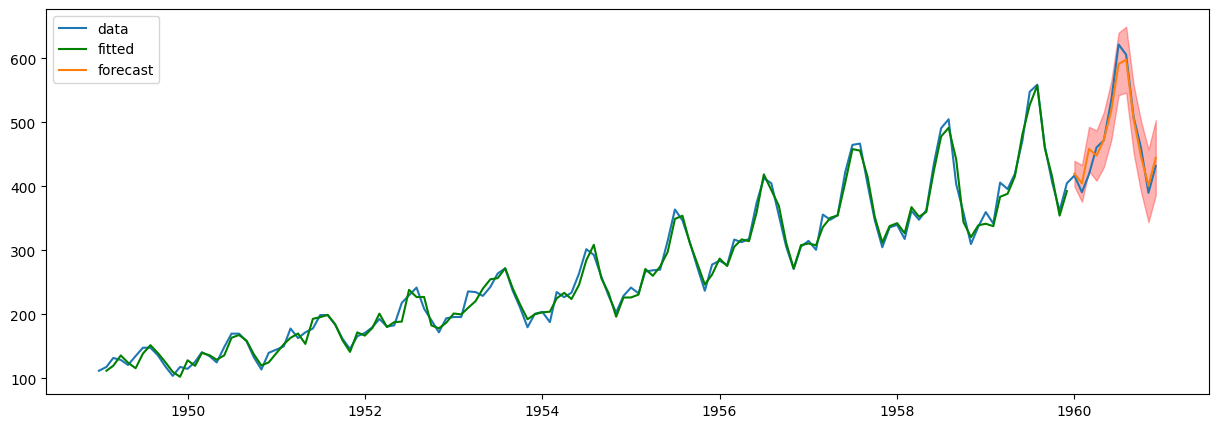

In [45]:
# Fit with ARIMA(12, 1, 0)
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

c:\aconda\envs\time_series_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


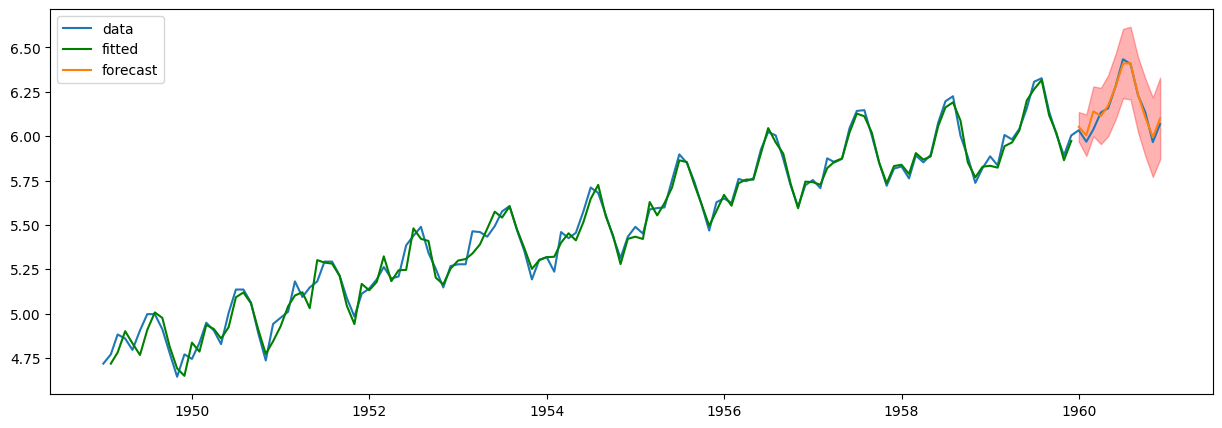

In [50]:
# Fit with ARIMA(12, 1, 0) on log of passengers
arima = ARIMA(train['LogPassengers'], order=(12, 1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [51]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    if is_logged:
        forecast = np.exp(forecast)

    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t - y)**2))

In [52]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.0645895557893
ARIMA(8,1,1) logged: 61.59831706658763
ARIMA(12,1,0): 17.492484848300677
ARIMA(12,1,0) logged: 16.118833518620665
